In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [143]:
max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18
print(type(max))

<class 'tuple'>


In [144]:
df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12], 'max' : [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] , 'min' : [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
df1 = df
df1

,month,max,min
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


In [145]:
# df1 = df.drop(['month'], axis =1)
# /from scipy.optimize import curve_fit 
# /df1 = df
# /plt1 = df1.plot.scatter(x = 'month', y = 'max')
# /plt2 =df1.plot.kde(x = 'month', y = 'max')
# /df1.plot.scatter(x = 'month', y = 'min', ax=plt1)
# /df1.plot.kde(x = 'month', y = 'min', ax = plt2)
# param, param_cov = curve_fit(f = gaussian, x= 'month', y= 'max') 
# plt.plot(x, param, '--', color ='blue', label ="optimized data")
# plt.legend() 
# plt.show

In [146]:
# x = df1['month']
# y = df1 ['max']
# from scipy import optimize

# def test_func(x, a, b):
#     return a * np.sin(b * x)

# params, params_covariance = optimize.curve_fit(test_func, x, y,
#                                                p0=[2, 2])

# print(params)

In [147]:
# plt.figure(figsize=(6, 4))
# plt.scatter(x, y, label='Data')
# plt.plot(x, test_func(x, params[0], params[1]),
#          label='Fitted function')

# plt.legend(loc='best')

# plt.show()

In [148]:
months =[1,2,3,4,5,6,7,8,9,10,11,12]
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      min, [-40, 20, 0])

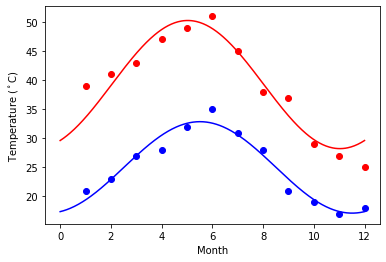

In [149]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [150]:
url = "https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"
data = pd.read_csv(url)
data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


843
466
        Count
Male      843
Female    466


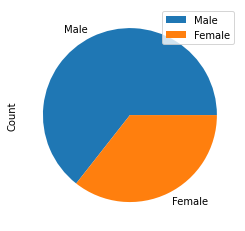

In [151]:
# df = pd.DataFrame({'month':[1,2,3,4,5,6,7,8,9,10,11,12], 'max' : [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25] , 'min' : [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})
data['sex'].isnull().values.any()
gen_count = data['sex'].value_counts()
print(gen_count[0])
print(gen_count[1])
# gender = pd.DataFrame({'Male' :[gen_count[0]], 'Female': [gen_count[1]]})

gender = pd.DataFrame({ 'Count': [gen_count[0] ,gen_count[1]]}, index=['Male', 'Female'])
print(gender)
gender.plot.pie(y='Count')

In [152]:

# data.plot.scatter(x = data['fare'], y= data['age'])

<class 'pandas.core.frame.DataFrame'>
          fare      age  sex
0     211.3375  29.0000    2
1     151.5500   0.9167    1
2     151.5500   2.0000    2
3     151.5500  30.0000    1
4     151.5500  25.0000    2
...        ...      ...  ...
1301    7.2250  45.5000    1
1304   14.4542  14.5000    2
1306    7.2250  26.5000    1
1307    7.2250  27.0000    1
1308    7.8750  29.0000    1

[1045 rows x 3 columns]


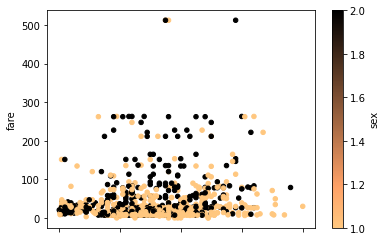

In [153]:
data1 = data[['fare','age','sex']]

print(type(data1))

data1 = data1.dropna()
data1['fare'].isnull().sum()
# data1['fare'] = data1['fare'].astype('int')

sex = {'male': 1,'female': 2}
data1.sex = [sex[item] for item in data1.sex] 
# print(data1['fare'])
print(data1)
data1.plot.scatter(x ='age', y='fare',c='sex', colormap='copper_r')